# Equipo de datos en Wizeline
Hoy vamos a trabajar con python para poder hacer analisis de datos.

Nosotros somos el equipo de Ciencia de Datos de Wizeline, y trabajamos en distintos proyectos para clientes que quieren explotar su informacion.

![alt text](https://cdn-images-1.medium.com/max/2600/1*QGWyxDaFhavZa495eJBO9Q.jpeg)


## Ciencia de Datos
Como en el metodo cientifico nosotros hacemos:
*  observaciones
* hipotesis 
* recoleccion de datos
* experimientaciones 
* conclusiones.
![alt text](https://previews.123rf.com/images/chudtsankov/chudtsankov1308/chudtsankov130800435/21699405-cient%C3%ADfico-o-profesor-sonr%C3%ADe-con-una-idea.jpg)

## Ingenieria de datos
Aprovechando las tecnologias, tambien podemos hacer que se compartan grandes cantidades de informacion. 
Algunas aplicaciones del uso de tecnologias para estos intercambios son:
* Para que los buscadores para darte los resultados de la busqueda en segundos.
* Para que en las redes sociales puedas ver contenido que te interesa rapidamente.
![alt text](https://www.interware.com.mx/hs-fs/hubfs/hero-collaboration-partial-777x437.png?width=1554&name=hero-collaboration-partial-777x437.png)

Hoy vamos a revisar hacer una exploracion de datos usando algunas tecnologias.

1) Colab - es un notebook, es decir una plataforma que te permite mezclar palabras con codigo (es la pagina en la que estamos ahora)
2) Python - es uno de los dos principales lenguajes de programacion usados para datos (el otro es R)
3) Medidas de distribucion central, grafias de barras, histogramas y percentiles - son maneras de resumir la informacion para poder sacar conclusiones.




# Preparacion

Para poder trabajar hoy en sus computadoras tienen que:
1. abrir https://colab.research.google.com/
2. Iniciar sesion con una cuenta de gmail
3. Seleccionar "file> Upload notebook"![alt text](https://drive.google.com/file/d/1rwKJUlxRk6GqJPgWtv3fAz4TDY_xX5uO/view?usp=sharing)
4. Irse a la seccion que dice github
5. Poner el siguiente URL


Una vez en el notebook, deben correr el siguiente codigo que contiene formulas y cargas de informacion que vamos a usar:

In [37]:
%matplotlib inline
import collections
import os, requests, zipfile, io
import numpy as np
import pandas as pd
from itertools import islice
import plotly.graph_objs as go
import plotly.plotly as py
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
from pandas.tools.plotting import scatter_matrix
from IPython.display import Image
import collections
import os, requests, zipfile, io
import numpy as np
import pandas as pd
from itertools import islice
import plotly.graph_objs as go
import plotly.plotly as py
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
from pandas.tools.plotting import scatter_matrix
from IPython.display import Image
import requests
import urllib.request

if not os.path.isdir('../Data/UCI HAR Dataset/'):
    HAR_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
    req = requests.get(HAR_URL)
    compressed = zipfile.ZipFile(io.BytesIO(req.content))
    compressed.extractall('./Data/')


def hist_plot(data, feature, bins, log=False):
    plt.figure()
    plt.hist(data, bins=bins)
    if log:
        plt.yscale('log')
    plt.title(feature)
    plt.show()

def scattermatrixplot(dataframe,column,act_filters,feature):
    active = dataframe[dataframe[column].isin(act_filters)]
    correlations =active[[feature+'-X',feature+'-Y',feature+'-Z']]
    colors = [act_color[dataframe.activities.iloc[idx]] for idx in correlations.index.values]
    axes = scatter_matrix(correlations,c=colors, alpha=0.5, diagonal='kde')
    plt.show()            

act_color = {'WALKING':'black',
             'WALKING_UPSTAIRS':'gold',
             'WALKING_DOWNSTAIRS':'magenta',
             'SITTING':'red',
             'STANDING':'green',
             'LAYING':'blue'}

activity_label = {1: 'WALKING',2: 'WALKING_UPSTAIRS',3: 'WALKING_DOWNSTAIRS',4: 'SITTING',5: 'STANDING',6:'LAYING'}
activities = pd.read_table('https://raw.githubusercontent.com/csmc88/HAR-dataset-unzipped/master/train/y_train.txt', header=None, delim_whitespace=True)
activities.columns = ['activity']
activities = activities.replace({'activity':activity_label})

#load subjects
subjects = pd.read_table('https://raw.githubusercontent.com/csmc88/HAR-dataset-unzipped/master/train/subject_train.txt', header=None, delim_whitespace=True)

#load the feature names
features = pd.read_table('https://raw.githubusercontent.com/csmc88/HAR-dataset-unzipped/master/features.txt', header=None, delim_whitespace=True)

#load the observations
observations= pd.read_table('https://raw.githubusercontent.com/csmc88/HAR-dataset-unzipped/master/train/X_train.txt', header=None, delim_whitespace=True, names=features[1])
observations['subject'] = subjects
observations['activities'] = activities

observaciones = observations[['activities','subject', 'tBodyAcc-max()-X','tBodyAcc-max()-Y','tBodyAcc-max()-Z','tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']]
observaciones.columns = ['actividades','sujetos','aceleracion maxima eje X','aceleracion maxima eje Y', 'aceleracion maxima eje Z','aceleracion promedio eje X','aceleracion promedio eje Y','aceleracion promedio eje Z']


/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning:

Duplicate names specified. This will raise an error in the future.



# Medidas de distribucion central

Cuando tienes mucos valores, es dificil entenderlos todos. En especial cuando tienes muchisimos valores.

Revisemos la siguiente tabla de actividades realizadas por personas:



In [38]:
observaciones

,actividades,sujetos,aceleracion maxima eje X,aceleracion maxima eje Y,aceleracion maxima eje Z,aceleracion promedio eje X,aceleracion promedio eje Y,aceleracion promedio eje Z
0,STANDING,1,-0.934724,-0.567378,-0.744413,0.288585,-0.020294,-0.132905
1,STANDING,1,-0.943068,-0.557851,-0.818409,0.278419,-0.016411,-0.123520
2,STANDING,1,-0.938692,-0.557851,-0.818409,0.279653,-0.019467,-0.113462
3,STANDING,1,-0.938692,-0.576159,-0.829711,0.279174,-0.026201,-0.123283
4,STANDING,1,-0.942469,-0.569174,-0.824705,0.276629,-0.016570,-0.115362
5,STANDING,1,-0.942469,-0.565684,-0.822766,0.277199,-0.010098,-0.105137
6,STANDING,1,-0.940987,-0.565684,-0.817189,0.279454,-0.019641,-0.110022
7,STANDING,1,-0.940987,-0.572638,-0.817189,0.277432,-0.030488,-0.125360
8,STANDING,1,-0.940598,-0.564175,-0.823527,0.277293,-0.021751,-0.120751
9,STANDING,1,-0.940028,-0.554594,-0.815850,0.280586,-0.009960,-0.106065


### Analizar

preguntas de apoyo:
* Cuantas actividades hay?
* Como se comporta la aceleracion promedio en el eje de las X?


### Resumir
Tenemos muchas overvaciones, de hecho con el siguiente codigo podemos ver mejor el tamaño de la tabla:

In [40]:
print(observaciones.shape)

(7352, 8)


Para facilitar la vida, podemos usar las medidas de tendencia central. Este es un nombre largo para valores que ustedes ya conocen:
* Promedio o media
* Mediana
* Moda


### Promedio
Suma todos los valores de una columna / la cantidad de valores en la columna

### Moda
El valor que se presenta con mas frecuencia en la columna

### Mediana
1. Ordenar de menor a mayor los valores 
2. Seleccionar el que se encuentra en la mitad


# Revisemos quienes lo entienden


In [45]:
observaciones.describe()

,sujetos,aceleracion maxima eje X,aceleracion maxima eje Y,aceleracion maxima eje Z,aceleracion promedio eje X,aceleracion promedio eje Y,aceleracion promedio eje Z
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,17.413085,-0.468604,-0.306043,-0.557121,0.274488,-0.017695,-0.109141
std,8.975143,0.544547,0.282243,0.293867,0.070261,0.040811,0.056635
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,-0.936219,-0.563561,-0.812744,0.262975,-0.024863,-0.120993
50%,19.000000,-0.881637,-0.479677,-0.736516,0.277193,-0.017219,-0.108676
75%,26.000000,-0.017129,-0.065364,-0.332014,0.288461,-0.010783,-0.097794
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Viendo estos resumenes de valores, podemos observar 2 cosas:
1. Estamos sacando valores de columnas que ya dicen reportar esos valores.
2. Hay muchos datos y la mayoria de los valores van del 0 al 1
3. Que observan al comparar los valores entre las columnas?

# Histogramas y graficos de barras


Ahora vamos a usar graficas de las tablas para resumir mejor los datos que tenemos

## Graficos de barras
Son buenos para ver cuanto se repiten los valores. Es para datos categoricos, es decir, nobres de cosas.

En estos graficos el orden no importa, solo el total.

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: activity, dtype: int64


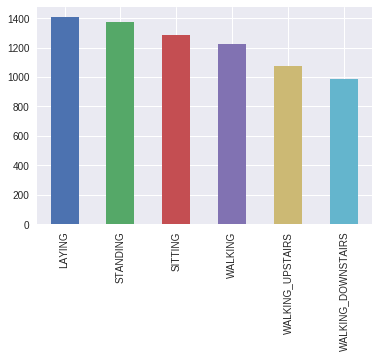

In [42]:

print(activities.activity.value_counts())
activities.activity.value_counts().plot(kind='bar')

## Histogramas

Esta herramienta te cuando tienes valores numericos, y quieres ver como estan organizados.

1. Los ordenas 
2. Los agrupas.
3. Cuentas las frecuencias
4. Usas las frecuencias para cada grupo para graficar

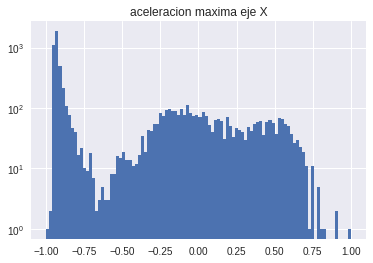

In [47]:
feature = 'aceleracion maxima eje X'
mean_series_to_plot = observaciones[feature]
hist_plot(mean_series_to_plot, feature, 100, True)

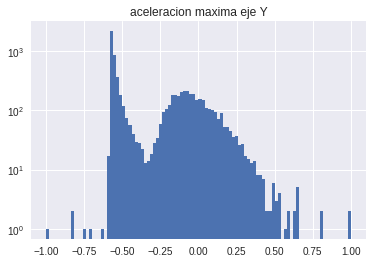

In [48]:
feature = 'aceleracion maxima eje Y'
mean_series_to_plot = observaciones[feature]
hist_plot(mean_series_to_plot, feature, 100, True)

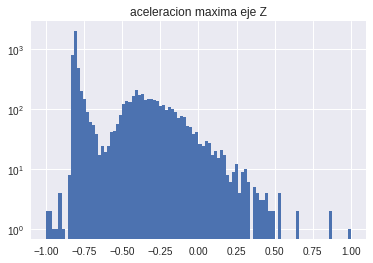

In [49]:
feature = 'aceleracion maxima eje Z'
mean_series_to_plot = observaciones[feature]
hist_plot(mean_series_to_plot, feature, 100, True)

# Percentiles

Los percentiles son como la mediana, puntos entre los valores ordenados que aseguran que un porcentaje de valores estan debajo de el.

In [50]:
feature = 'aceleracion maxima eje Z'
np.percentile( observaciones[feature], 25)

-0.81274385

In [52]:
feature = 'aceleracion maxima eje Z'
np.percentile( observaciones[feature], 50)

-0.73651557

In [51]:
feature = 'aceleracion maxima eje Z'
np.percentile( observaciones[feature], 75)

-0.33201356